In [16]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import MultiLabelBinarizer
import math  


In [58]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 

from sklearn.metrics.pairwise import cosine_similarity

from bokeh.io import show, curdoc, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, Select, Paragraph, TextInput
from bokeh.layouts import widgetbox, column, row
from ipywidgets import interact


from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 

import markovify
import string

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import warnings; warnings.simplefilter('ignore')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harshini/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/harshini/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/harshini/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [60]:
from sklearn.metrics import classification_report

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [19]:
df = pd.read_csv('cosmetic.csv', index_col=[0])

In [20]:
df.head()

,Name,URL,brand,price,rank,skin_type,ingredients
Label,,,,,,,
moisturizing-cream-oils-mists,The Dewy Skin Cream Plumping & Hydrating Moist...,https://www.sephora.com/product/the-dewy-skin-...,Tatcha,$69.00,4 stars,Skin Type: Normal and Dry,"Aqua/Water/Eau, Saccharomyces/Camellia Sinensi..."
moisturizing-cream-oils-mists,Revealer Skin-Improving Foundation SPF25 with ...,https://www.sephora.com/product/kosas-revealer...,Kosas,$42.00,4 stars,NaN,"Zinc Oxide (7.5%), Water, Ethylhexyl Olivate, ..."
moisturizing-cream-oils-mists,Plum Plump Hyaluronic Acid Moisturizer,https://www.sephora.com/product/glow-recipe-pl...,Glow Recipe,$39.00,4.5 stars,"Skin Type: Normal, Dry, Combination, and Oily","Water/Aqua/Eau, Propanediol, Glycerin, C13-15 ..."
moisturizing-cream-oils-mists,The Water Cream Oil-Free Pore Minimizing Moist...,https://www.sephora.com/product/the-water-crea...,Tatcha,$69.00,4 stars,NaN,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl..."
moisturizing-cream-oils-mists,Barrier+ Triple Lipid-Peptide Face Cream,https://www.sephora.com/product/barrier-lipid-...,Skinfix,$52.00,4.5 stars,"Skin Type: Normal, Dry, and Oily","Water/Eau/Aqua, Caprylic/Capric Triglyceride, ..."


In [21]:
def clean_data(df):
    df.loc[df['Label'] == "moisturizing-cream-oils-mists", 'Label'] = "moisturizer"
    df.loc[df['Label'] == "facial-treatments", 'Label'] = "face_treatment"
    df.loc[df['Label'] == "face-mask", 'Label'] = "face_mask"
    df.loc[df['Label'] == "eye-treatment-dark-circle-treatment", 'Label'] = "eye_treatment"
    df.loc[df['Label'] == "sunscreen-sun-protection", 'Label'] = "sunscreen"
    df.drop(columns=['URL'], inplace=True)

In [22]:
def preprocess_ingredients(df):
    df.dropna(subset=['ingredients'], inplace=True)
    df.reset_index(drop=True, inplace=True)
    processed_ingredient = [t.split('\r\n\r\n') for t in df['ingredients']]
    pattern = ['\r\n', '-\w+:', 'Please', 'No Info', 'This product', 'Visit']

    for i in range(len(df)):
        num = len(processed_ingredient[i])
        for j in range(num):
            if all(x not in processed_ingredient[i][j] for x in pattern):
                df['ingredients'][i] = processed_ingredient[i][j]
    return df

In [23]:
def skin_type_preprocessing(data):
    data['skin_type'].fillna(data.mode()['skin_type'][0], inplace=True)
    data.isnull().sum()
    data['skin_type'].unique()
    data['skin_type'] = data['skin_type'].str.replace('and', ',')
    data['skin_type'] = data['skin_type'].str.replace(' ', '')
    data['skin_type'] = data['skin_type'].str.replace(',,', ',')
    data['skin_type'] = data['skin_type'].str.replace('Oily', 'Oil')
    jp = data['skin_type'].str.split(':', n=1, expand=True)
    data['skin_type'] = jp[1]
    data['skin_type'].replace('', data.mode()['skin_type'][0], inplace=True)
    data['skin_type'] = data['skin_type'].str.replace('.', '')
    data.skin_type = data.skin_type.str.split(',')
    mlb = MultiLabelBinarizer(sparse_output=True)
    data = data.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(data.pop('skin_type')), index=data.index, columns=mlb.classes_))
    return data


In [24]:
def preprocess_price(data):
    data['price'].fillna('$0', inplace=True)
    for idx, row in data.iterrows():
        curr = str(data.loc[idx, 'price'])
        if ' ' in curr:
            data.loc[idx, 'price'] = int(math.ceil(float(curr.split(' ')[0][1:])))
        else:
            data.loc[idx, 'price'] = int(math.ceil(float(curr[1:])))
    return data

In [25]:
def preprocess_rank(data):
    data.dropna(subset=['rank'], inplace=True)
    for idx, row in data.iterrows():
        curr = str(data.loc[idx, 'rank'])
        data.loc[idx, 'rank'] = float(curr.split(' ')[0])
    return data    


In [27]:
if __name__ == '__main__':
    df = pd.read_csv('cosmetic.csv', na_values={'NA', '#NAME?'})
    clean_data(df)
    df = preprocess_ingredients(df)
    df = skin_type_preprocessing(df)
    df = preprocess_price(df)
    df = preprocess_rank(df)
    df.to_csv('cosmetic_preprocess.csv', index=False)

/var/folders/bw/bzn516ss4zgbt1v843gn7xkm0000gn/T/ipykernel_60157/322101702.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['skin_type'] = data['skin_type'].str.replace('.', '')


In [31]:
pdf=pd.read_csv('cosmetic_preprocess.csv')

In [32]:
pdf.head()

,Label,Name,brand,price,rank,ingredients,Combination,Dry,Mature,Normal,Oil,Sensitive
0,moisturizer,The Dewy Skin Cream Plumping & Hydrating Moist...,Tatcha,69,4.0,"Aqua/Water/Eau, Saccharomyces/Camellia Sinensi...",0,1,0,1,0,0
1,moisturizer,Revealer Skin-Improving Foundation SPF25 with ...,Kosas,42,4.0,"Zinc Oxide (7.5%), Water, Ethylhexyl Olivate, ...",1,1,0,1,1,0
2,moisturizer,Plum Plump Hyaluronic Acid Moisturizer,Glow Recipe,39,4.5,"Water/Aqua/Eau, Propanediol, Glycerin, C13-15 ...",1,1,0,1,1,0
3,moisturizer,The Water Cream Oil-Free Pore Minimizing Moist...,Tatcha,69,4.0,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",1,1,0,1,1,0
4,moisturizer,Barrier+ Triple Lipid-Peptide Face Cream,Skinfix,52,4.5,"Water/Eau/Aqua, Caprylic/Capric Triglyceride, ...",0,1,0,1,1,0


In [35]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [37]:
stopwords = set(STOPWORDS)
stopwords.update(['read', 'more', 'product'])

In [38]:
def generate_wordcloud(data):
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(data)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [40]:
moist_df = pdf[pdf.Name == 'Moisturizer']
cleanse_df = pdf[pdf.Name == 'Cleanser']
mask_df = pdf[pdf.Name == 'Face Mask']
treat_df = pdf[pdf.Name == 'Treatment']

In [47]:
moist = " ".join(ing for ing in moist_df.Name)
cleanse = " ".join(ing for ing in cleanse_df.ingredients)
mask = " ".join(ing for ing in mask_df.ingredients)
treat = " ".join(ing for ing in treat_df.ingredients)

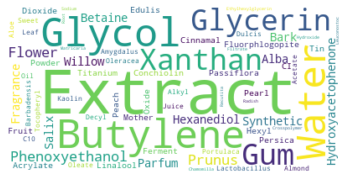

In [44]:
generate_wordcloud(mask)

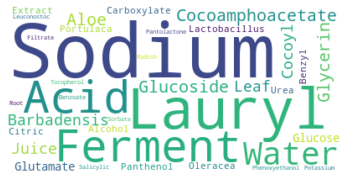

In [45]:
generate_wordcloud(cleanse)

In [66]:
X = df.ingredients
y = df.Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 42)

In [67]:
categories = ['moisturizer', 'cleanser', 'face_treatment']

In [68]:
from sklearn.pipeline import Pipeline

In [70]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))


accuracy 0.42070484581497797


In [62]:
print(y_pred)

['moisturizer' 'moisturizer' 'moisturizer' 'moisturizer' 'moisturizer'
 'moisturizer' 'moisturizer' 'moisturizer' 'moisturizer' 'face_treatment'
 'face_treatment' 'moisturizer' 'moisturizer' 'face_treatment'
 'face_treatment' 'face_treatment' 'moisturizer' 'face_treatment'
 'cleanser' 'face_treatment' 'face_treatment' 'moisturizer' 'moisturizer'
 'moisturizer' 'moisturizer' 'face_treatment' 'moisturizer' 'moisturizer'
 'moisturizer' 'face_treatment' 'face_treatment' 'moisturizer'
 'moisturizer' 'face_treatment' 'moisturizer' 'moisturizer' 'cleanser'
 'moisturizer' 'moisturizer' 'moisturizer' 'cleanser' 'moisturizer'
 'moisturizer' 'face_treatment' 'face_treatment' 'moisturizer'
 'moisturizer' 'face_treatment' 'face_treatment' 'moisturizer'
 'moisturizer' 'moisturizer' 'moisturizer' 'moisturizer' 'moisturizer'
 'moisturizer' 'moisturizer' 'moisturizer' 'moisturizer' 'moisturizer'
 'face_treatment' 'moisturizer' 'moisturizer' 'moisturizer' 'moisturizer'
 'moisturizer' 'moisturizer' 'mois